In [1]:
#pip install pingouin

import pingouin as pn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

import statsmodels.api as sm

#%matplotlib inline

In [2]:
data = pd.read_csv('data_omollo.csv')

In [3]:
data

,CN_ID,IND_ID,CHQ_ID,EM2021,EM2020,EM2019,EM2018,EM2017,RU2021,RU2020,...,FS2021,FS2020,FS2019,FS2018,FS2017,LV2021,LV2020,LV2019,LV2018,LV2017
0,1,2,1,59.415584,62.244898,64.634146,66.500000,70.348837,57.692308,57.089552,...,22.714080,22.632010,22.641684,22.702952,22.747134,0.376769,0.301842,0.332004,0.347779,0.334881
1,2,2,1,36.440678,35.964912,50.000000,51.818182,43.000000,35.964912,36.792453,...,22.494671,22.420421,22.544852,22.559036,22.287906,0.224894,0.142302,0.234121,0.100162,0.229117
2,3,2,1,69.285714,70.338983,57.017544,31.818182,35.454545,44.029851,39.473684,...,22.112328,22.004239,22.014170,22.112557,22.596864,0.558066,0.601182,0.592452,0.445909,0.426005
3,4,1,2,76.530612,75.203252,62.500000,72.674419,62.676056,92.910448,93.303571,...,22.272495,22.277598,22.166444,22.067820,22.081137,0.195132,0.207382,0.218713,0.248842,0.012002
4,5,3,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.291634,21.362402,21.549070,21.518131,21.528267,0.276344,0.321604,0.333450,0.322718,0.354017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,87,2,25,38.135593,37.719298,35.454545,30.000000,27.000000,30.701754,34.905660,...,21.927924,21.911088,21.871435,21.854673,21.802944,0.215643,0.219259,0.228084,0.231720,0.243981
85,89,2,25,81.972789,85.772358,81.500000,78.488372,59.859155,63.059701,65.625000,...,23.067770,23.022244,23.004300,22.971374,22.942328,0.360363,0.377278,0.329137,0.282012,0.241784
86,65,3,25,61.564626,66.260163,31.500000,22.674419,7.746479,7.462687,8.035714,...,22.409491,22.502307,22.528122,22.493392,22.357870,0.215118,0.247890,0.225321,0.240168,0.193548
87,84,3,25,83.333333,91.463415,70.500000,57.558140,47.183099,48.880597,55.803571,...,22.029732,21.788183,21.768969,21.611322,21.534907,0.148845,0.236365,0.319814,0.335048,0.366983


In [4]:
data.columns

Index(['CN_ID', 'IND_ID', 'CHQ_ID', 'EM2021', 'EM2020', 'EM2019', 'EM2018',
       'EM2017', 'RU2021', 'RU2020', 'RU2019', 'RU2018', 'RU2017', 'EI2021',
       'EI2020', 'EI2019', 'EI2018', 'EI2017', 'ROA2021', 'ROA2020', 'ROA2019',
       'ROA2018', 'ROA2017', 'ROE2021', 'ROE2020', 'ROE2019', 'ROE2018',
       'ROE2017', 'FS2021', 'FS2020', 'FS2019', 'FS2018', 'FS2017', 'LV2021',
       'LV2020', 'LV2019', 'LV2018', 'LV2017'],
      dtype='object')

In [5]:
# converting the dataframe from wide to long
import itertools as it

colNames = ['CN_ID', 'IND_ID', 'CHQ_ID', 'EM', 'RU','EI','ROA','ROE','FS','LV']

year_colunm = []
column_data = []

repeat_cols = colNames[0:3]

# make convert each column name into an empty list variable
for item in colNames:
    locals()[item]=[]


# grab data and append it to th

for name in colNames:
    
    if name in repeat_cols:
       # x = list(data[name])
        
        # grab the data corresponding to each item in repeat_col list
        df_subset = list(data[name])
        
        # replicate each column 5 times (length of 2017 - 2021) and rbind thim
        new_list = df_subset *5


      
        
        locals()[name] = new_list
    else:
        column_data = []
        df_subset = data.filter(regex=name, axis=1)
        #print(df_subset.columns)
        
        
        for colname in df_subset.columns:
            # create a list called year and yepeat each year length of the original dataframe times
            if colname[0:2] == 'EM':
                
                # grab each year as a list and repeat the list *n times (n is the lenth of the original data (89) rows)
                new_year=[colname[-4:]] * len(df_subset)
                
                #append the created list ti the bigger list containing other years
                year_colunm.append(new_year)
            
            # loop through each years column and get the correspondind data. Join the data into a single list
            
            col_data = df_subset.filter(regex = colname[-4:], axis =1)
            col_data = col_data[col_data.columns[0]]
            
                #flat_list = list(itertools.chain(*new_list))
            
            column_data.append(col_data)
            # flatten the list
        column_data = list(np.concatenate(column_data).flat)
        
        locals()[name] = column_data
        
# flatten the year list            
year_colunm = list(np.concatenate(year_colunm).flat)           
 
# combine all the created lists into a dataframe
long_data = pd.DataFrame({
    'CN_ID': CN_ID,
    'IND_ID': IND_ID,
    'CHQ_ID' : CHQ_ID,
    'Year' : year_colunm,
    'EM': EM,
    'RU' : RU,
    'EI': EI,
    'ROA':ROA,
    'ROE': ROE,
    'FS':FS,
    'LV': LV
    
})

long_data

,CN_ID,IND_ID,CHQ_ID,Year,EM,RU,EI,ROA,ROE,FS,LV
0,1,2,1,2021,59.415584,57.692308,0.0,0.062133,0.141931,22.714080,0.376769
1,2,2,1,2021,36.440678,35.964912,50.0,0.047013,0.107257,22.494671,0.224894
2,3,2,1,2021,69.285714,44.029851,50.0,0.026121,0.221638,22.112328,0.558066
3,4,1,2,2021,76.530612,92.910448,0.0,0.060561,0.283454,22.272495,0.195132
4,5,3,2,2021,0.000000,0.000000,0.0,-0.015718,-0.026849,21.291634,0.276344
...,...,...,...,...,...,...,...,...,...,...,...
440,87,2,25,2017,27.000000,20.652174,0.0,-0.000308,-0.001107,21.802944,0.243981
441,89,2,25,2017,59.859155,65.942029,0.0,0.059889,0.113228,22.942328,0.241784
442,65,3,25,2017,7.746479,0.000000,0.0,0.008526,0.014053,22.357870,0.193548
443,84,3,25,2017,47.183099,13.043478,0.0,0.034198,0.113703,21.534907,0.366983


#### compare the shape of the original data (wide format) to the new data (long format)

 - The shape changed from (***38 columns with 89***) rows to only (***11 columns with 445 rows***).
 - The data is now **READY FOR MODELLING**

In [6]:
print('The shape of the original data: ', data.shape)
print('The shape of the formatted data: ', long_data.shape)

The shape of the original data:  (89, 38)
The shape of the formatted data:  (445, 11)


#### Linear Regression Model Assumption Testing

In [7]:
#import matplotlib.pyplot as plt
#from test_lm_normality import test_linear_regression_assumptions


#test_linear_regression_assumptions(long_data,['EM', 'RU', 'EI'],['ROA', 'ROE'], 'LV')

----------------------------------TESTING FOR ASSUMPTIONS FOR ROA-----------------------------------

Assumption 1: Linear Relationship between the PREDICTOR and the RESPONSE variables

Assumption 2: RESIDUAL ERRORS are: random,independent

Assumption 3: Residual  errors are normally distributed

Assumption 4: Residual errors are homoscedastics


<Figure size 1500x1000 with 0 Axes>

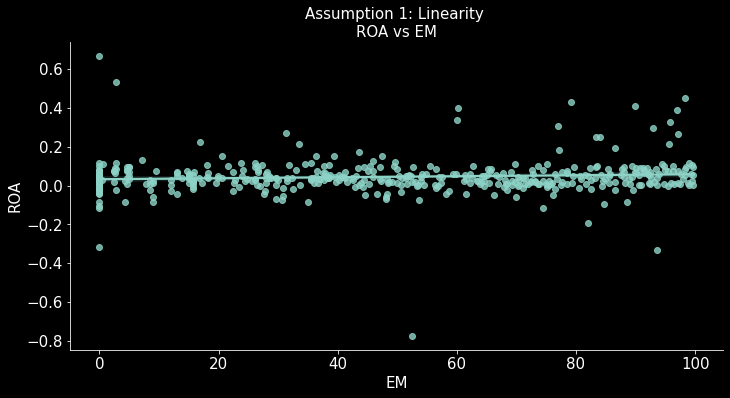

Training completed


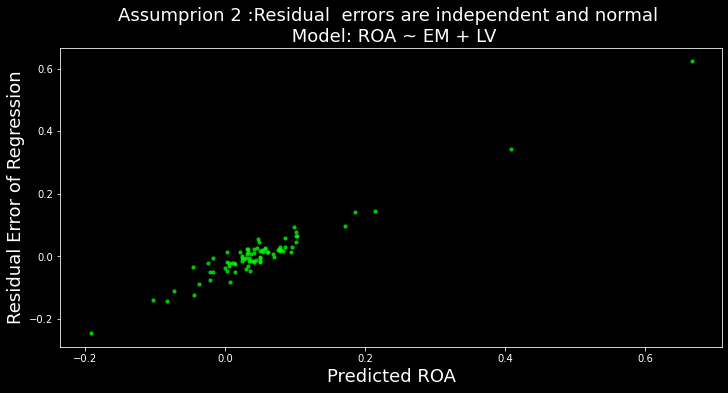

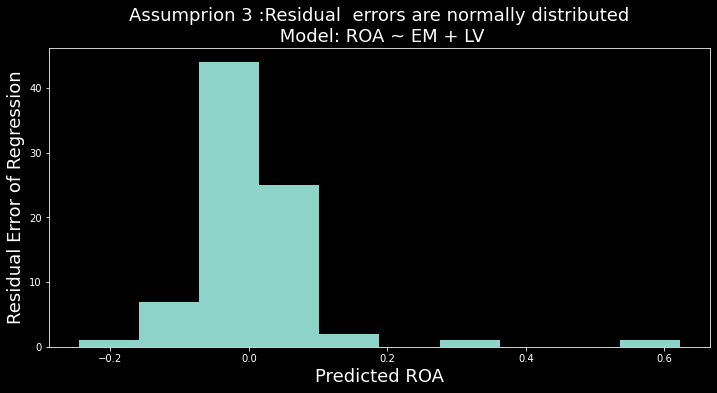


Perfoming the  Jarque Bera Test for residual ...


RESIDUAL NORMALITY TEST RESULTS FOR (ROA ~ EM + LV) MODEL

                     stat        value
0        Jarque-Bera test  1435.195768
1  Chi-squared(2) p-value     0.000000
2                Skewness     3.329627
3                Kurtosis    22.516596
 **** Residuals of the linear regression model are for all practical purposes not normally distributed ****


Perfoming the  White test for heteroscedasticity ...


RESIDUAL HOMOCEDACITY TEST RESULTS FOR (ROA ~ EM + LV) MODEL

                             stat     value
0  Lagrange Multiplier statistic:  4.039331
1              LM test's p-value:  0.543767
2                    F-statistic:  0.787285
3               F-test's p-value:  0.562093
**** Residuals of the linear regression model are homocedastic ****




<Figure size 1500x1000 with 0 Axes>

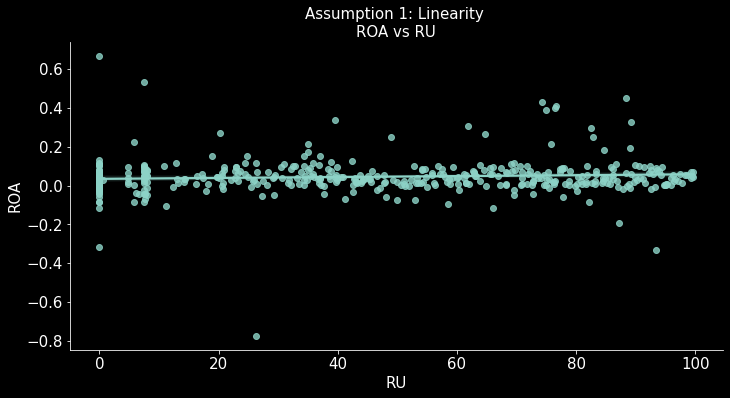

Training completed


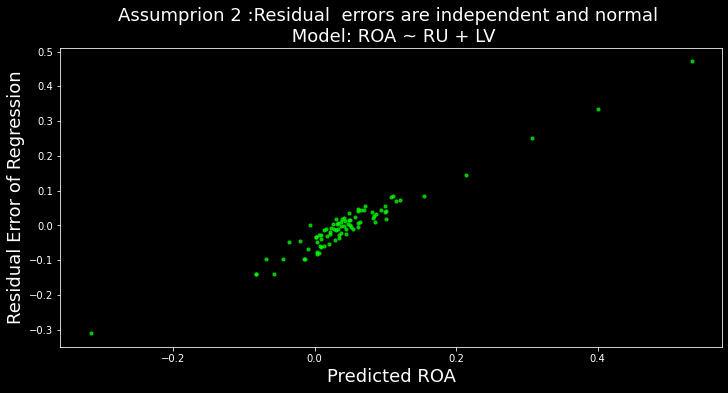

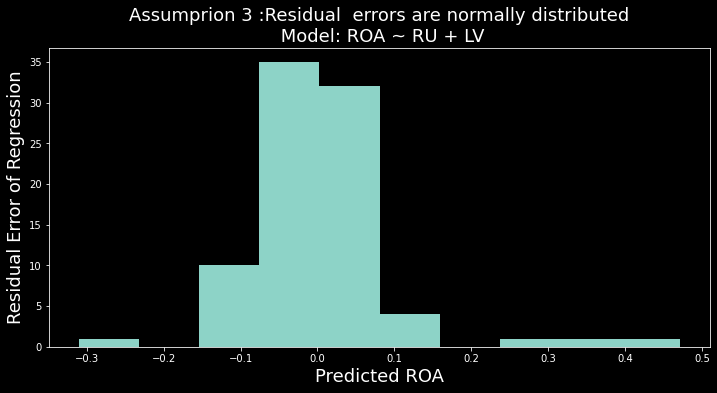


Perfoming the  Jarque Bera Test for residual ...


RESIDUAL NORMALITY TEST RESULTS FOR (ROA ~ RU + LV) MODEL

                     stat         value
0        Jarque-Bera test  3.557603e+02
1  Chi-squared(2) p-value  5.592870e-78
2                Skewness  1.751274e+00
3                Kurtosis  1.239053e+01
 **** Residuals of the linear regression model are for all practical purposes not normally distributed ****


Perfoming the  White test for heteroscedasticity ...


RESIDUAL HOMOCEDACITY TEST RESULTS FOR (ROA ~ RU + LV) MODEL

                             stat     value
0  Lagrange Multiplier statistic:  9.247823
1              LM test's p-value:  0.099578
2                    F-statistic:  1.928864
3               F-test's p-value:  0.098789
**** Residuals of the linear regression model are homocedastic ****




<Figure size 1500x1000 with 0 Axes>

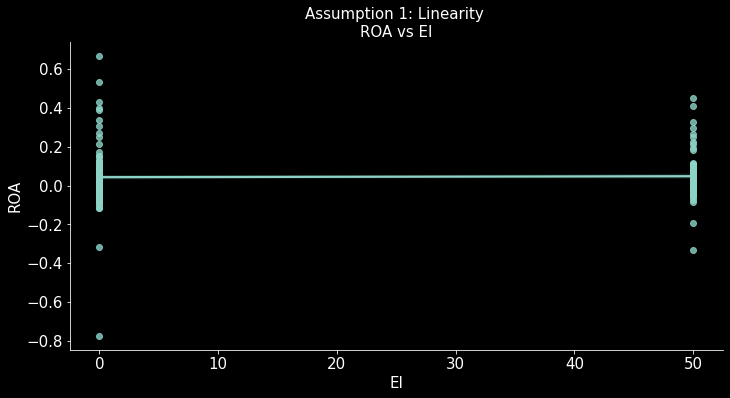

Training completed


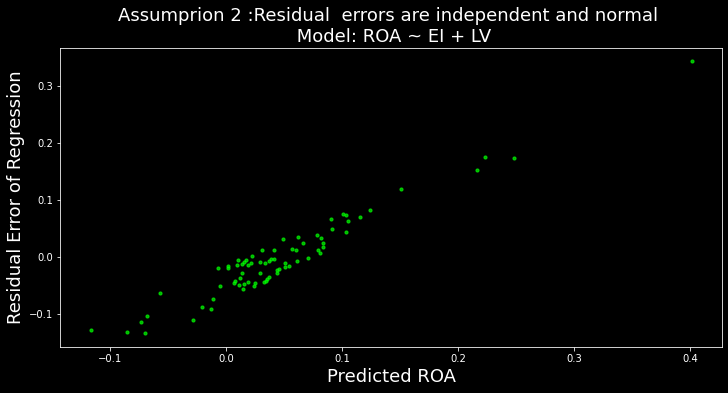

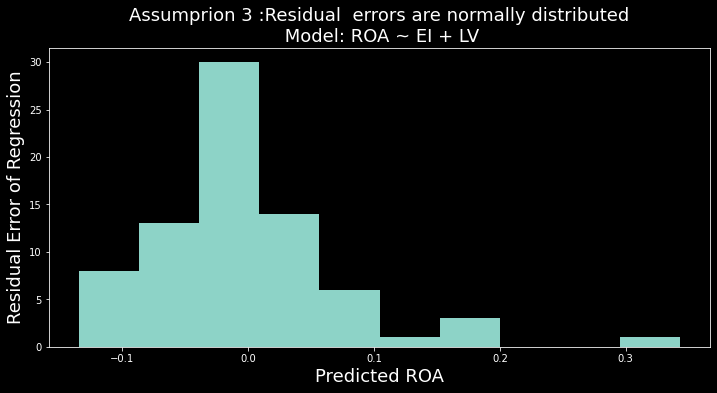


Perfoming the  Jarque Bera Test for residual ...


RESIDUAL NORMALITY TEST RESULTS FOR (ROA ~ EI + LV) MODEL

                     stat         value
0        Jarque-Bera test  1.359327e+02
1  Chi-squared(2) p-value  3.038021e-30
2                Skewness  1.636112e+00
3                Kurtosis  8.676149e+00
 **** Residuals of the linear regression model are for all practical purposes not normally distributed ****


Perfoming the  White test for heteroscedasticity ...


RESIDUAL HOMOCEDACITY TEST RESULTS FOR (ROA ~ EI + LV) MODEL

                             stat     value
0  Lagrange Multiplier statistic:  1.742651
1              LM test's p-value:  0.782956
2                    F-statistic:  0.416552
3               F-test's p-value:  0.796169
**** Residuals of the linear regression model are homocedastic ****


----------------------------------TESTING FOR ASSUMPTIONS FOR ROE-----------------------------------

Assumption 1: Linear Relationship between the PREDICTOR and the RESPON

<Figure size 1500x1000 with 0 Axes>

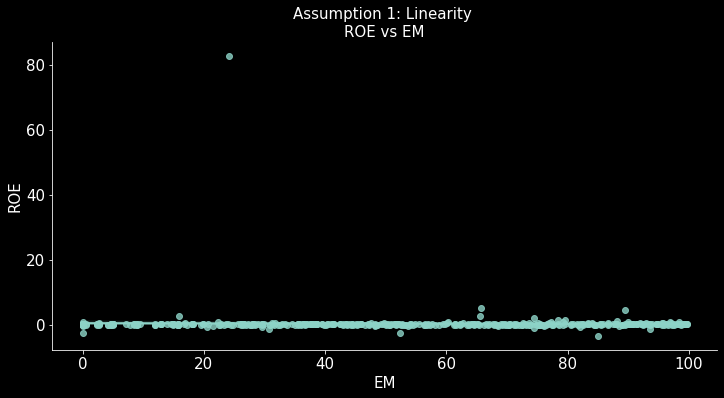

Training completed


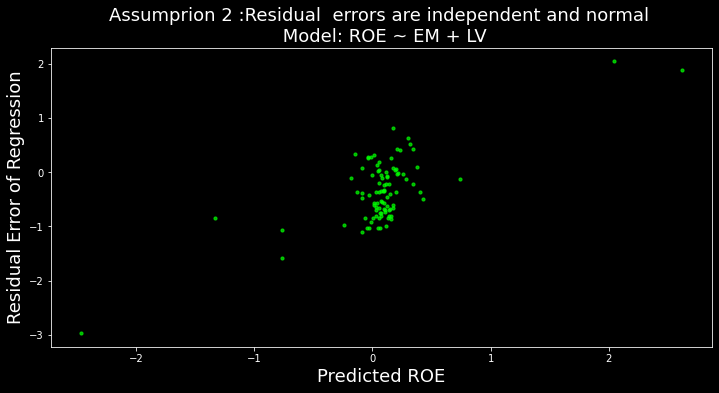

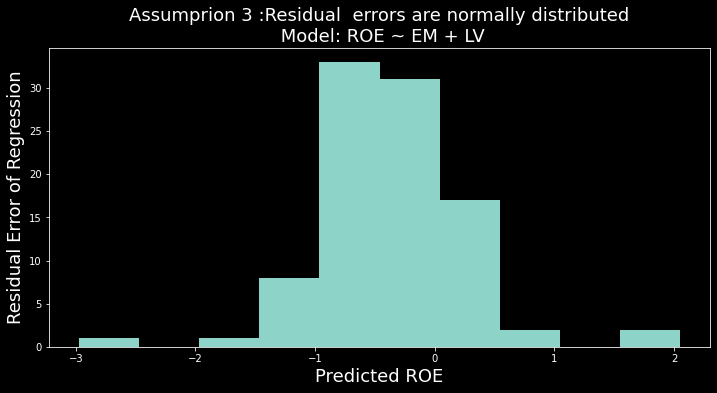


Perfoming the  Jarque Bera Test for residual ...


RESIDUAL NORMALITY TEST RESULTS FOR (ROE ~ EM + LV) MODEL

                     stat         value
0        Jarque-Bera test  9.375132e+01
1  Chi-squared(2) p-value  4.386910e-21
2                Skewness  2.886276e-01
3                Kurtosis  7.832320e+00
 **** Residuals of the linear regression model are for all practical purposes not normally distributed ****


Perfoming the  White test for heteroscedasticity ...


RESIDUAL HOMOCEDACITY TEST RESULTS FOR (ROE ~ EM + LV) MODEL

                             stat     value
0  Lagrange Multiplier statistic:  6.779870
1              LM test's p-value:  0.237533
2                    F-statistic:  1.367961
3               F-test's p-value:  0.243975
**** Residuals of the linear regression model are homocedastic ****




<Figure size 1500x1000 with 0 Axes>

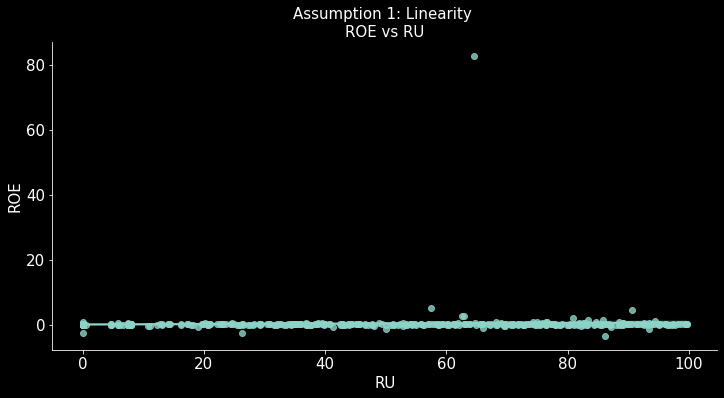

Training completed


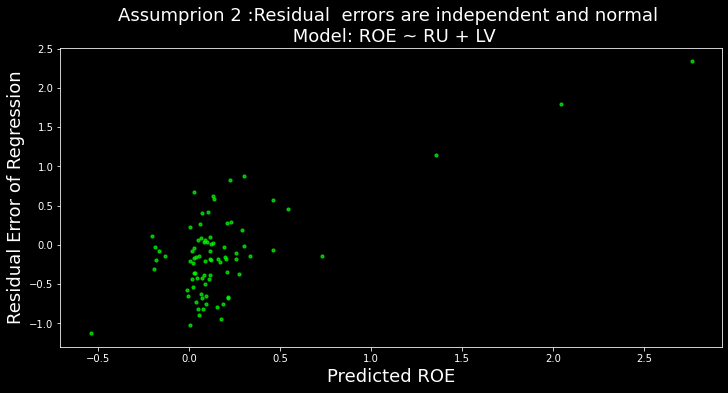

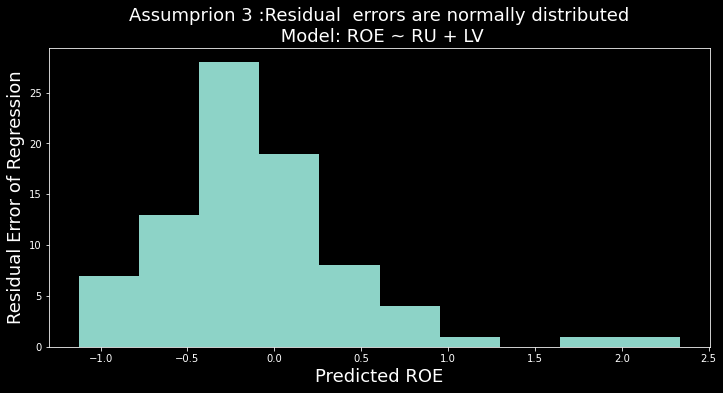


Perfoming the  Jarque Bera Test for residual ...


RESIDUAL NORMALITY TEST RESULTS FOR (ROE ~ RU + LV) MODEL

                     stat         value
0        Jarque-Bera test  9.103978e+01
1  Chi-squared(2) p-value  1.702017e-20
2                Skewness  1.490286e+00
3                Kurtosis  7.214496e+00
 **** Residuals of the linear regression model are for all practical purposes not normally distributed ****


Perfoming the  White test for heteroscedasticity ...


RESIDUAL HOMOCEDACITY TEST RESULTS FOR (ROE ~ RU + LV) MODEL

                             stat     value
0  Lagrange Multiplier statistic:  8.213787
1              LM test's p-value:  0.144840
2                    F-statistic:  1.692044
3               F-test's p-value:  0.146729
**** Residuals of the linear regression model are homocedastic ****




<Figure size 1500x1000 with 0 Axes>

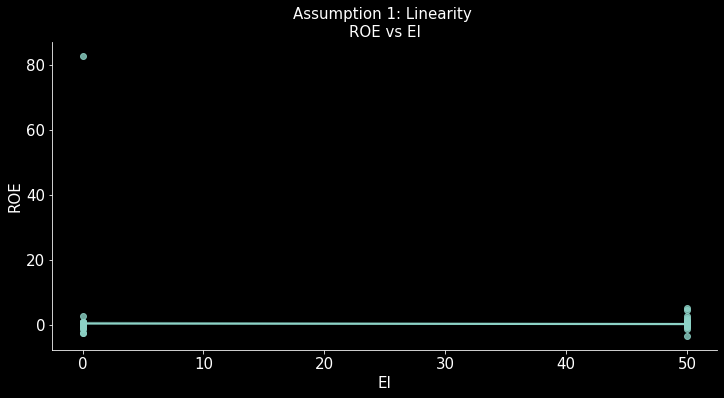

Training completed


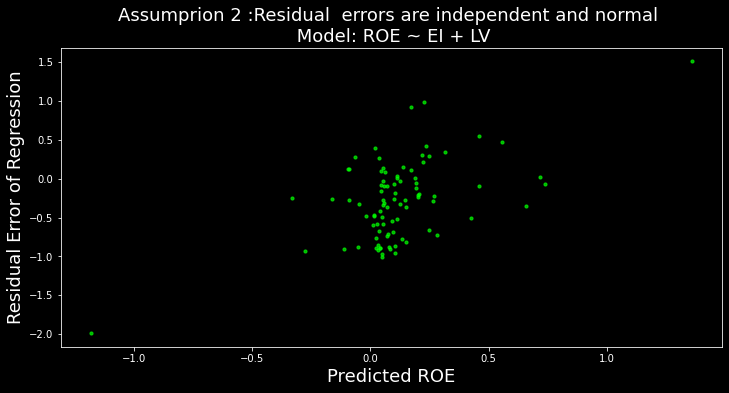

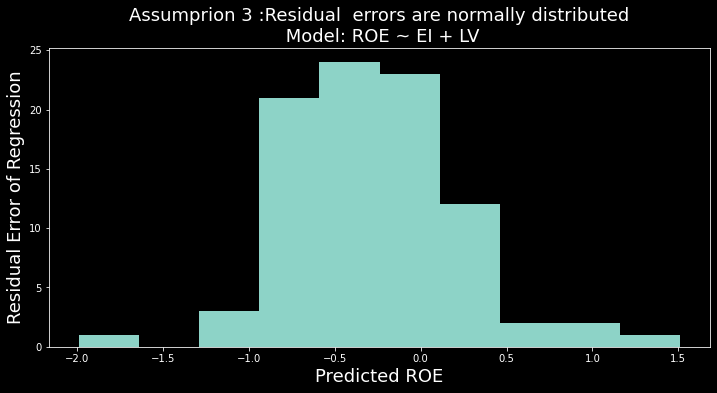


Perfoming the  Jarque Bera Test for residual ...


RESIDUAL NORMALITY TEST RESULTS FOR (ROE ~ EI + LV) MODEL

                     stat      value
0        Jarque-Bera test  11.470538
1  Chi-squared(2) p-value   0.003230
2                Skewness   0.307726
3                Kurtosis   4.647543
 **** Residuals of the linear regression model are for all practical purposes not normally distributed ****


Perfoming the  White test for heteroscedasticity ...


RESIDUAL HOMOCEDACITY TEST RESULTS FOR (ROE ~ EI + LV) MODEL

                             stat      value
0  Lagrange Multiplier statistic:  25.550049
1              LM test's p-value:   0.000039
2                    F-statistic:   8.456287
3               F-test's p-value:   0.000009
 **** Residuals of the linear regression model are for all practical purposes not homocedastic ****




In [9]:
def test_linear_regression_assumptions(data, predictor, response, control):
    

    plt.style.use('dark_background')
    import statsmodels.formula.api as smf
    import statsmodels.api as sm
    from statsmodels.compat import lzip
    import statsmodels.stats.api as sms
    from statsmodels.stats.diagnostic import het_white


    from patsy import dmatrices

    #import statsmodels.api as sm

    #%matplotlib inline


    #long_data_as_npArray = long_data.to_numpy()

    #response = ['ROA', 'ROE']
    #predictor_var_list = ['EM', 'RU', 'EI']

    #control = 'FS'


    #fig, scatter = plt.subplots(figsize=(11.85,5.5))
    #fig, residual_independece = plt.subplots(figsize=(11.85,5.5))
    #fig, residual_normality = plt.subplots(figsize=(11.85,5.5))



    ##############################
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """





    #############################
    for response_var in response:
        print (f'----------------------------------TESTING FOR ASSUMPTIONS FOR {response_var}-----------------------------------')

        print('\n============================================================================================')

        print('Assumption 1: Linear Relationship between the PREDICTOR and the RESPONSE variables')
        print('\nAssumption 2: RESIDUAL ERRORS are: random,independent')

        print('\nAssumption 3: Residual  errors are normally distributed')

        print('\nAssumption 4: Residual errors are homoscedastics')

        print('===============================================================================================')


        for predictor_var in predictor:
            plt.figure(figsize=(15, 10),dpi = 100)


            sns.lmplot(x=predictor_var, y=response_var,data = data, fit_reg=True, palette='viridis', height=5, aspect=2)
            plt.ylabel(f'{response_var}',fontsize=15)
            plt.xlabel(f'{predictor_var}',fontsize=15)
            plt.tick_params(axis='x', labelsize=15)
            plt.tick_params(axis='y', labelsize=15)
            plt.title(f'Assumption 1: Linearity \n{response_var} vs {predictor_var}', fontsize=15)
            plt.show()


            '''
            Residual Error: Assumes that residual errors left over 
                            from fitting the model to the data are independent, 
                            identically distributed random variables

            '''

            model_expr = f'{response_var} ~ {predictor_var} + {control}'
            y, X = dmatrices(model_expr, data, return_type='dataframe')
            mask = np.random.rand(len(X)) < 0.8
            X_train = X[mask]
            y_train = y[mask]
            X_test = X[~mask]
            y_test = y[~mask]

            olsr_results = sm.OLS(y_train, X_train).fit()
            olsr_predictions = olsr_results.get_prediction(X_test)
            prediction_summary_frame = olsr_predictions.summary_frame()

            #print('Training completed')

            #print(olsr_results.summary())
            print('Training completed')

            resid = y_test[response_var] - prediction_summary_frame['mean']

            fig, ax = plt.subplots(figsize=(11.85,5.5))
            ax.scatter(y_test[response_var], resid, s=10, c='lime', alpha = 0.7, marker ='o')

            ax.set_xlabel(f'Predicted {response_var}', fontsize=18)
            ax.set_ylabel('Residual Error of Regression', fontsize=18)
            ax.set_title(f'Assumprion 2 :Residual  errors are independent and normal \n Model: {model_expr}', fontsize=18)

            plt.show()



            '''
            Assumpption 3: The residual errors should all have a normal distribution with a mean of zero. 
                           In statistical language:
            '''


            fig, ay = plt.subplots(figsize=(11.85,5.5))

            ay.hist(resid)
            #sns.distplot(resid)

            ay.set_xlabel(f'Predicted {response_var}', fontsize=18)
            ay.set_ylabel('Residual Error of Regression', fontsize=18)
            ay.set_title(f'Assumprion 3 :Residual  errors are normally distributed\n Model: {model_expr}', fontsize=18)

            #resid.hist(bins=50)
            plt.show()
            

            name = ['Jarque-Bera test', 'Chi-squared(2) p-value', 'Skewness', 'Kurtosis']

            #run the Jarque-Bera test for Normality on the residuals vector
            test = sms.jarque_bera(resid)
            
            print('\nPerfoming the  Jarque Bera Test for residual ...')
            
            print('\n==================================================================================================================\n')
            
            print(f'RESIDUAL NORMALITY TEST RESULTS FOR ({model_expr}) MODEL')
            
            print('\n==================================================================================================================')
            
            print(pd.DataFrame({
                'stat':name,
                'value':test
            }))

            
            if test[1] < 0.01:
                print(' **** Residuals of the linear regression model are for all practical purposes not normally distributed ****')
            else:
                print('**** Residuals of the linear regression model are normally distributed ****')

            print('\n==================================================================================================================\n')
            # Assumption 4:
            '''
            Assumpption 4: Residual error homoscedasity:
            '''

            keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
            #run the White test
            results = het_white(resid, X_test)

            #print the results. We will get to see the values of two test-statistics and the corresponding p-values
            lzip(keys, results)
            
            print('Perfoming the  White test for heteroscedasticity ...')
            
            print('\n==================================================================================================================\n')
            
            print(f'RESIDUAL HOMOCEDACITY TEST RESULTS FOR ({model_expr}) MODEL')
            
            print('\n==================================================================================================================')
            
            print(pd.DataFrame({
                'stat':keys,
                'value':results
            }))

            
            if results[3] < 0.01:
                print(' **** Residuals of the linear regression model are for all practical purposes not homocedastic ****')
            else:
                print('**** Residuals of the linear regression model are homocedastic ****')

            print('\n==================================================================================================================\n')
        

test_linear_regression_assumptions(long_data,['EM', 'RU', 'EI'],['ROA', 'ROE'], 'LV')     

Since almost all the assumptions are not met, it isrecommended to transform the responce variable

- recommended transformations are:
    - log(transformation) and 
    - square-root(transformation)

#### Log transform the data

In [10]:
long_data['ROA'] = np.log10(abs(long_data['ROA']))

long_data['ROE'] = np.log10(abs(long_data['ROE']))

long_data

,CN_ID,IND_ID,CHQ_ID,Year,EM,RU,EI,ROA,ROE,FS,LV
0,1,2,1,2021,59.415584,57.692308,0.0,-1.206678,-0.847923,22.714080,0.376769
1,2,2,1,2021,36.440678,35.964912,50.0,-1.327782,-0.969574,22.494671,0.224894
2,3,2,1,2021,69.285714,44.029851,50.0,-1.583010,-0.654356,22.112328,0.558066
3,4,1,2,2021,76.530612,92.910448,0.0,-1.217807,-0.547517,22.272495,0.195132
4,5,3,2,2021,0.000000,0.000000,0.0,-1.803603,-1.571072,21.291634,0.276344
...,...,...,...,...,...,...,...,...,...,...,...
440,87,2,25,2017,27.000000,20.652174,0.0,-3.511449,-2.955852,21.802944,0.243981
441,89,2,25,2017,59.859155,65.942029,0.0,-1.222653,-0.946046,22.942328,0.241784
442,65,3,25,2017,7.746479,0.000000,0.0,-2.069255,-1.852231,22.357870,0.193548
443,84,3,25,2017,47.183099,13.043478,0.0,-1.465999,-0.944228,21.534907,0.366983


----------------------------------TESTING FOR ASSUMPTIONS FOR ROA-----------------------------------

Assumption 1: Linear Relationship between the PREDICTOR and the RESPONSE variables

Assumption 2: RESIDUAL ERRORS are: random,independent

Assumption 3: Residual  errors are normally distributed

Assumption 4: Residual errors are homoscedastics


<Figure size 1500x1000 with 0 Axes>

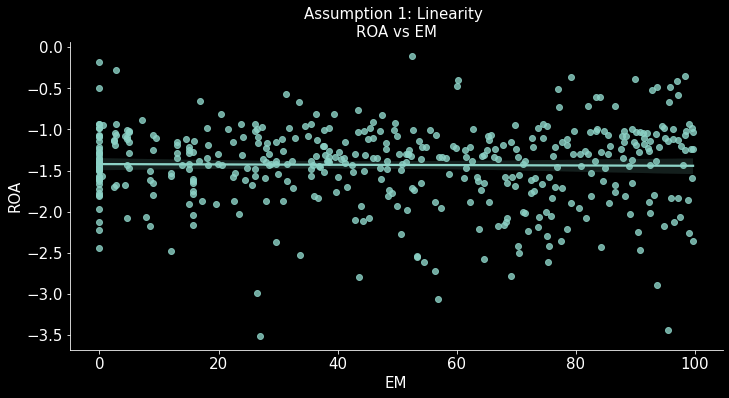

Training completed


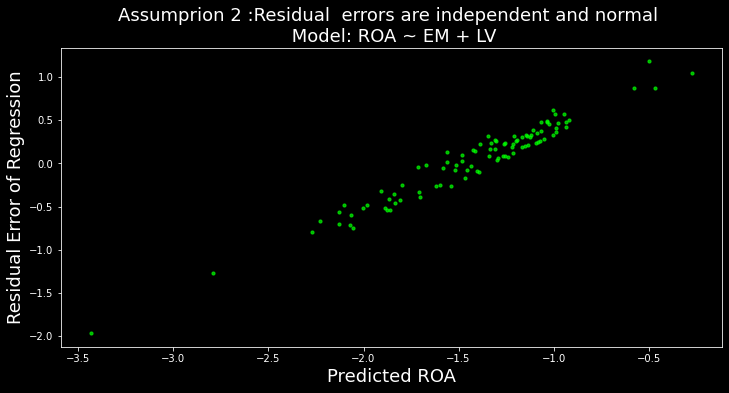

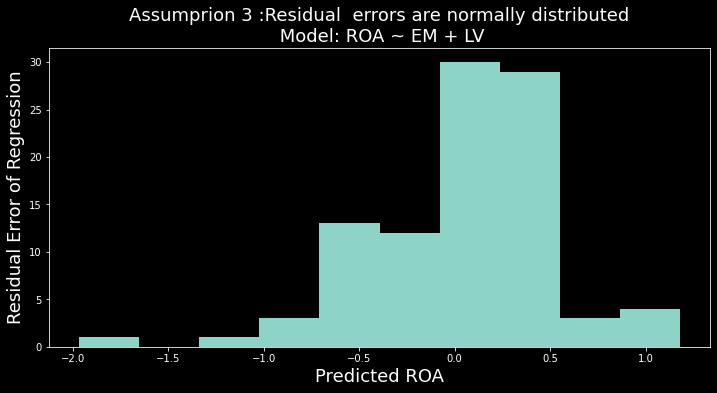


Perfoming the  Jarque Bera Test for residual ...


RESIDUAL NORMALITY TEST RESULTS FOR (ROA ~ EM + LV) MODEL

                     stat         value
0        Jarque-Bera test  4.402451e+01
1  Chi-squared(2) p-value  2.755490e-10
2                Skewness -9.580568e-01
3                Kurtosis  5.708253e+00
 **** Residuals of the linear regression model are for all practical purposes not normally distributed ****


Perfoming the  White test for heteroscedasticity ...


RESIDUAL HOMOCEDACITY TEST RESULTS FOR (ROA ~ EM + LV) MODEL

                             stat     value
0  Lagrange Multiplier statistic:  4.991341
1              LM test's p-value:  0.416938
2                    F-statistic:  0.987204
3               F-test's p-value:  0.430120
**** Residuals of the linear regression model are homocedastic ****




<Figure size 1500x1000 with 0 Axes>

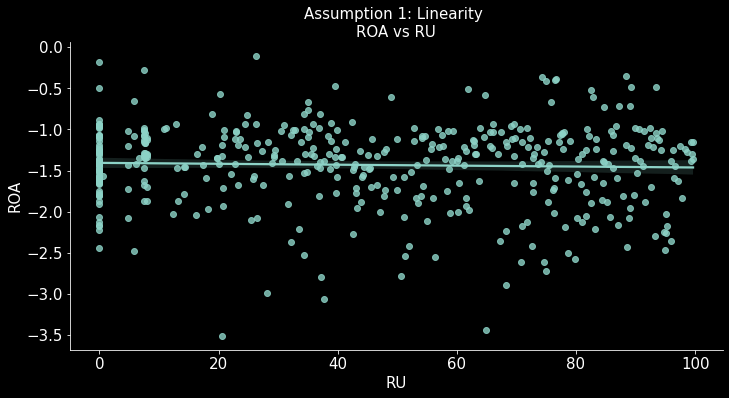

Training completed


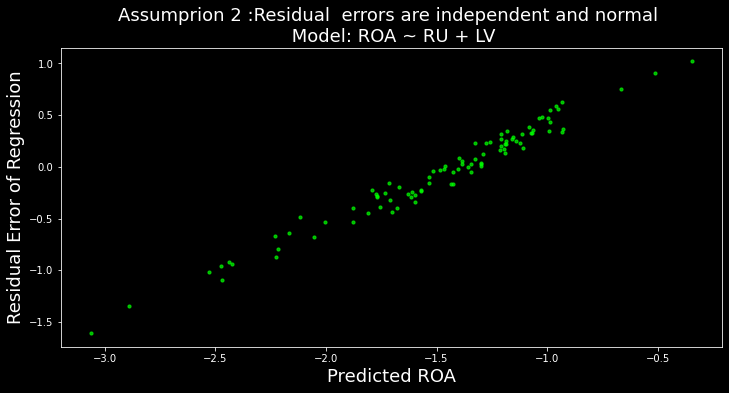

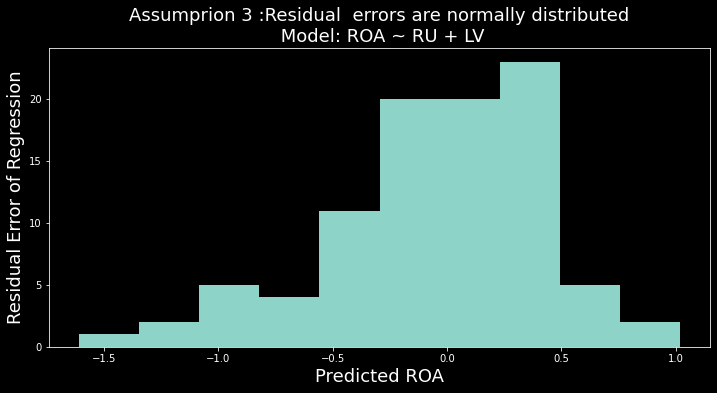


Perfoming the  Jarque Bera Test for residual ...


RESIDUAL NORMALITY TEST RESULTS FOR (ROA ~ RU + LV) MODEL

                     stat     value
0        Jarque-Bera test  8.822688
1  Chi-squared(2) p-value  0.012139
2                Skewness -0.670895
3                Kurtosis  3.690234
**** Residuals of the linear regression model are normally distributed ****


Perfoming the  White test for heteroscedasticity ...


RESIDUAL HOMOCEDACITY TEST RESULTS FOR (ROA ~ RU + LV) MODEL

                             stat     value
0  Lagrange Multiplier statistic:  8.104684
1              LM test's p-value:  0.150560
2                    F-statistic:  1.661122
3               F-test's p-value:  0.152552
**** Residuals of the linear regression model are homocedastic ****




<Figure size 1500x1000 with 0 Axes>

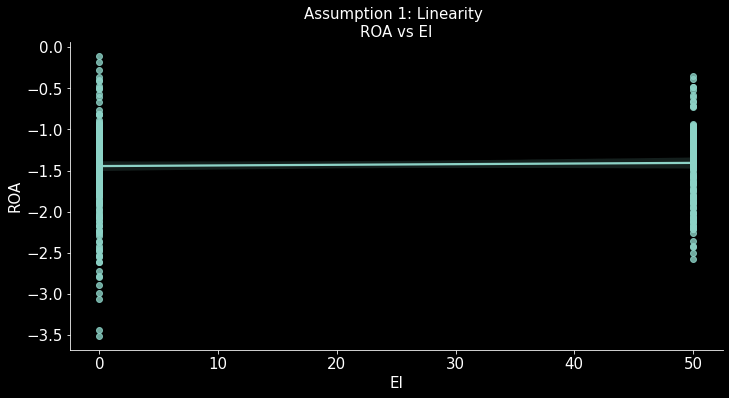

Training completed


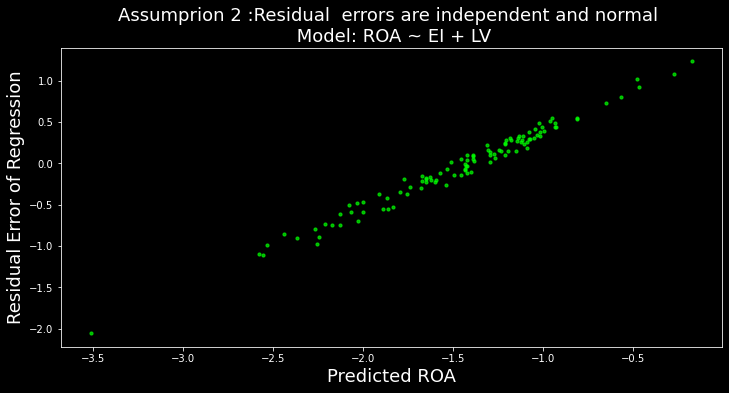

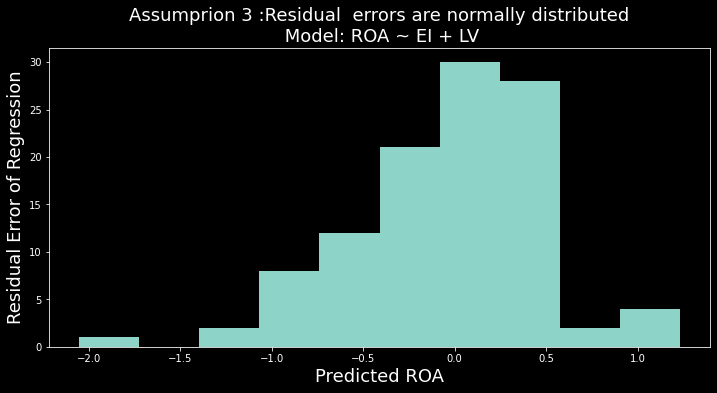


Perfoming the  Jarque Bera Test for residual ...


RESIDUAL NORMALITY TEST RESULTS FOR (ROA ~ EI + LV) MODEL

                     stat      value
0        Jarque-Bera test  17.296856
1  Chi-squared(2) p-value   0.000175
2                Skewness  -0.616507
3                Kurtosis   4.524277
 **** Residuals of the linear regression model are for all practical purposes not normally distributed ****


Perfoming the  White test for heteroscedasticity ...


RESIDUAL HOMOCEDACITY TEST RESULTS FOR (ROA ~ EI + LV) MODEL

                             stat     value
0  Lagrange Multiplier statistic:  1.264844
1              LM test's p-value:  0.867311
2                    F-statistic:  0.305145
3               F-test's p-value:  0.873946
**** Residuals of the linear regression model are homocedastic ****


----------------------------------TESTING FOR ASSUMPTIONS FOR ROE-----------------------------------

Assumption 1: Linear Relationship between the PREDICTOR and the RESPONSE variables

A

<Figure size 1500x1000 with 0 Axes>

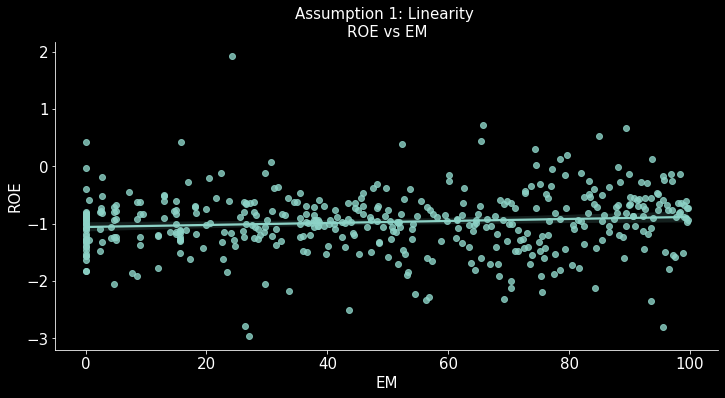

Training completed


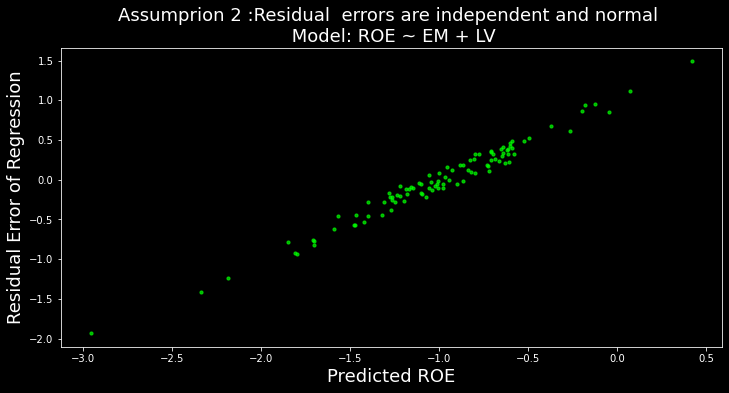

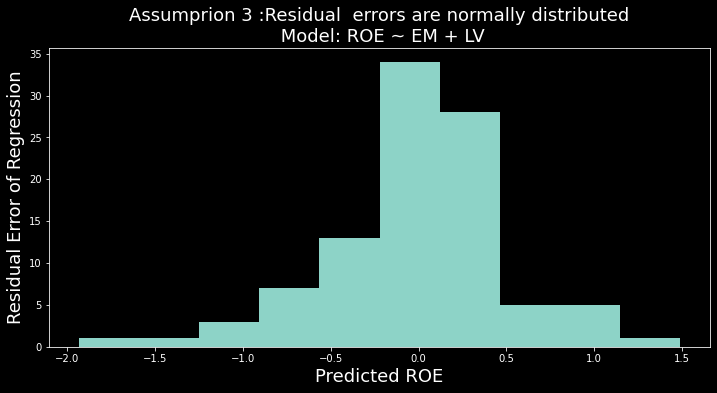


Perfoming the  Jarque Bera Test for residual ...


RESIDUAL NORMALITY TEST RESULTS FOR (ROE ~ EM + LV) MODEL

                     stat      value
0        Jarque-Bera test  21.798046
1  Chi-squared(2) p-value   0.000018
2                Skewness  -0.534037
3                Kurtosis   5.048784
 **** Residuals of the linear regression model are for all practical purposes not normally distributed ****


Perfoming the  White test for heteroscedasticity ...


RESIDUAL HOMOCEDACITY TEST RESULTS FOR (ROE ~ EM + LV) MODEL

                             stat     value
0  Lagrange Multiplier statistic:  4.045495
1              LM test's p-value:  0.542885
2                    F-statistic:  0.792268
3               F-test's p-value:  0.557935
**** Residuals of the linear regression model are homocedastic ****




<Figure size 1500x1000 with 0 Axes>

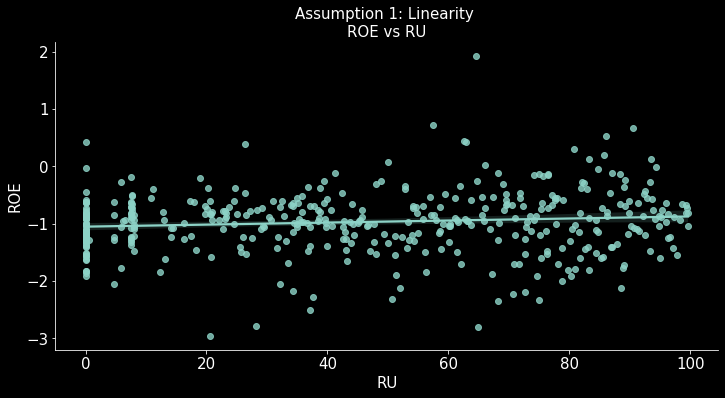

Training completed


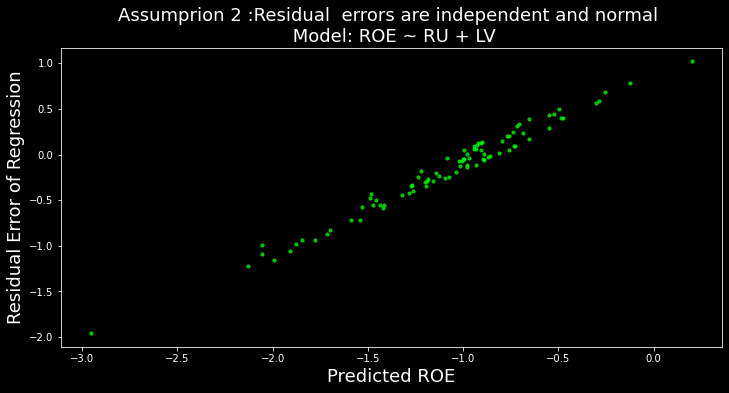

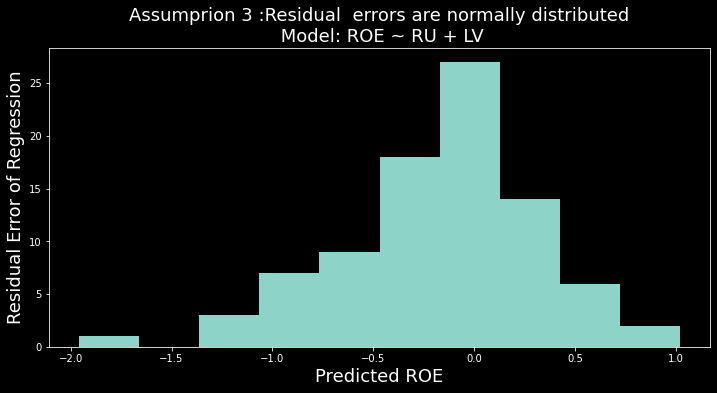


Perfoming the  Jarque Bera Test for residual ...


RESIDUAL NORMALITY TEST RESULTS FOR (ROE ~ RU + LV) MODEL

                     stat      value
0        Jarque-Bera test  10.765919
1  Chi-squared(2) p-value   0.004594
2                Skewness  -0.657778
3                Kurtosis   4.113202
 **** Residuals of the linear regression model are for all practical purposes not normally distributed ****


Perfoming the  White test for heteroscedasticity ...


RESIDUAL HOMOCEDACITY TEST RESULTS FOR (ROE ~ RU + LV) MODEL

                             stat     value
0  Lagrange Multiplier statistic:  2.578370
1              LM test's p-value:  0.764649
2                    F-statistic:  0.494774
3               F-test's p-value:  0.779273
**** Residuals of the linear regression model are homocedastic ****




<Figure size 1500x1000 with 0 Axes>

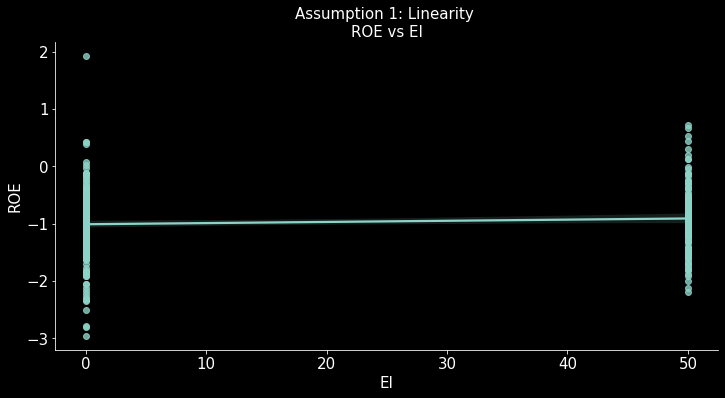

Training completed


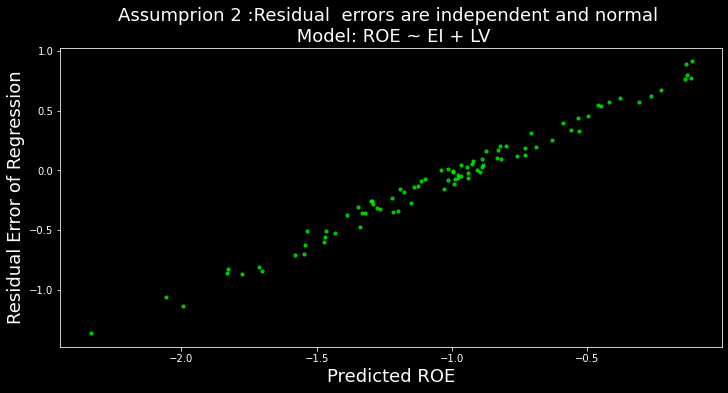

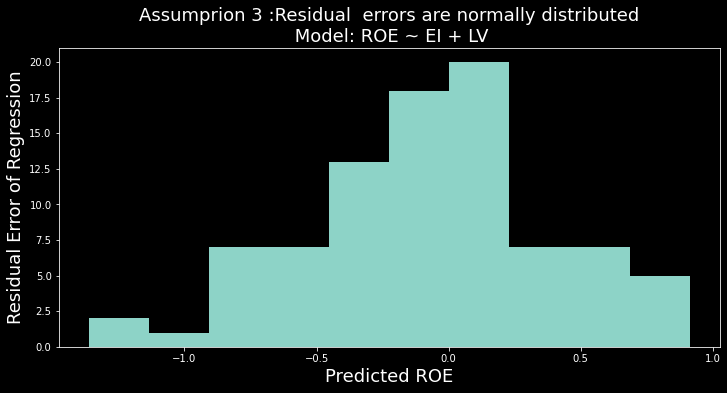


Perfoming the  Jarque Bera Test for residual ...


RESIDUAL NORMALITY TEST RESULTS FOR (ROE ~ EI + LV) MODEL

                     stat     value
0        Jarque-Bera test  0.670415
1  Chi-squared(2) p-value  0.715190
2                Skewness -0.214764
3                Kurtosis  3.021149
**** Residuals of the linear regression model are normally distributed ****


Perfoming the  White test for heteroscedasticity ...


RESIDUAL HOMOCEDACITY TEST RESULTS FOR (ROE ~ EI + LV) MODEL

                             stat     value
0  Lagrange Multiplier statistic:  2.658913
1              LM test's p-value:  0.616423
2                    F-statistic:  0.646277
3               F-test's p-value:  0.631086
**** Residuals of the linear regression model are homocedastic ****




In [11]:
test_linear_regression_assumptions(long_data,['EM', 'RU', 'EI'],['ROA', 'ROE'], 'LV') 

# My thought about the data and model choice

-  From the above tests, we have established that the assumptions for performing a linear regression are not met by the original data and even after log transformation on the response variable.

- We notice however that before the transformation,  the residual error varied with the response variable (the error variance was a function of y). This changed when the data response variable was transformed (look at the homocedacity assumptionnsection in the above tests).

- My personal opinion is that in majority of cases, residuals are never normally distributed, there is alwasys some level of skew. Given this, i would not stress too much about violating this assumption (ypou will not be the first u might just need to justify or report it in your model interpretation).

- Maybe including other predictor variables or including a quadratic term in the model would improve this situation (but i would say that this perhaps is out of this scope as the questions are quite specific).

- I woud choose high R-square over residual normality - I think it makes sense picking a model that can explain more variation in the data. Besides outliers always happen man, we cant avaoid that.

- 

#### Is there a statistically significant relationship between EM and ROA while controlling for firm size and leverage

- Here we will fit a linear regression model.We will explain the Dependent Variables: **ROA** as a function of EM and firm size(**FS**) then then a function of EM and leverage (**LV**). First without interaction term between **EM** and **LV/FS** (controlling for **LV/FS**, and assuming that **LV/FS** is constant) then another with interaction between **EM** and**LV/FS** (Assuming that the relationship between **ROA** and **EM** is different for different **LV/FS**).

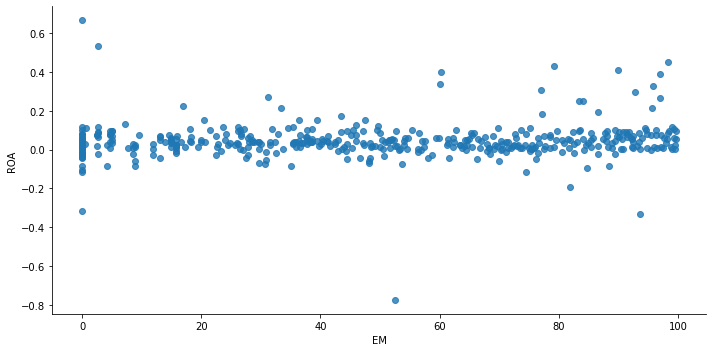

In [270]:
# first visualize the data


sns.lmplot(x='EM', y='ROA', data=long_data, fit_reg=False, palette='viridis', height=5, aspect=2)
plt.ylabel("ROA")
plt.xlabel("EM");

In [32]:
ROA_EM_no_interaction = smf.ols(formula='ROA ~ EM + LV', data=long_data).fit()
summary = ROA_EM_no_interaction.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     12.85
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           3.77e-06
Time:                        08:59:37   Log-Likelihood:                 438.51
No. Observations:                 445   AIC:                            -871.0
Df Residuals:                     442   BIC:                            -858.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0642      0.010      6.246      0.0

### Interpretation

- the model result above can be mathematically expressed as followes: 

    - ROA = *β0*+*β1*⋅EM+*β2*⋅LV
 
    - ROA=0.0642+0.0003⋅EM−0.1435⋅LV

###### explanation:
 - ROA increases by 0.0003 per unit increase in EM when LV is controlled (held constant)!
 - When LV and EM are both 0, ROA is expected to be 0.0642

###### reporting the model output:
 - The overall regression was statistically significant (R2 = .051, F = 12.85, p < 0.032).



In [286]:
ROA_EM_with_interaction = smf.ols(formula='ROA ~ EM + EM:LV', data=long_data).fit()
summary = ROA_EM_with_interaction.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.826
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           0.000174
Time:                        14:42:09   Log-Likelihood:                 434.65
No. Observations:                 445   AIC:                            -863.3
Df Residuals:                     442   BIC:                            -851.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0324      0.008      4.106      0.0

## Controlling for Firm Size

In [285]:
ROA_EM_LV_no_interaction = smf.ols(formula='ROA ~ EM + FS', data=long_data).fit()
summary = ROA_EM_LV_no_interaction.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     4.146
Date:                Sat, 30 Jul 2022   Prob (F-statistic):             0.0164
Time:                        14:41:58   Log-Likelihood:                 430.07
No. Observations:                 445   AIC:                            -854.1
Df Residuals:                     442   BIC:                            -841.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1667      0.092     -1.820      0.0

##### Interpretation: 

#### 2.	Is there a statistically significant relationship between EM and ROE while controlling for firm size and leverage

In [284]:
# a). CONTOLLING FOR FIRM SIZE


ROE_EM_LV_no_interaction = smf.ols(formula='ROE ~ EM + FS', data=long_data).fit()
summary = ROE_EM_LV_no_interaction.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6165
Date:                Sat, 30 Jul 2022   Prob (F-statistic):              0.540
Time:                        14:41:44   Log-Likelihood:                -1240.8
No. Observations:                 445   AIC:                             2488.
Df Residuals:                     442   BIC:                             2500.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3685      3.914      1.116      0.2

In [283]:
# b). CONTOLLING FOR LV


ROE_EM_LV_no_interaction = smf.ols(formula='ROE ~ EM + LV', data=long_data).fit()
summary = ROE_EM_LV_no_interaction.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.302
Date:                Sat, 30 Jul 2022   Prob (F-statistic):              0.273
Time:                        14:41:33   Log-Likelihood:                -1240.1
No. Observations:                 445   AIC:                             2486.
Df Residuals:                     442   BIC:                             2499.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8929      0.447      1.999      0.0

#### 3.	Is there a statistically significant relationship between RU and ROA while controlling for firm size and leverage

In [282]:
# a). CONTOLLING FOR FIRM SIZE


ROA_RU_FS_no_interaction = smf.ols(formula='ROA ~ RU + FS', data=long_data).fit()
summary = ROA_RU_FS_no_interaction.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     4.147
Date:                Sat, 30 Jul 2022   Prob (F-statistic):             0.0164
Time:                        14:41:16   Log-Likelihood:                 430.07
No. Observations:                 445   AIC:                            -854.1
Df Residuals:                     442   BIC:                            -841.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1685      0.089     -1.890      0.0

In [281]:
# b). CONTOLLING FOR LV


ROA_RU_LV_no_interaction = smf.ols(formula='ROA ~ RU + LV', data=long_data).fit()
summary = ROA_RU_LV_no_interaction.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     11.47
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           1.40e-05
Time:                        14:40:54   Log-Likelihood:                 437.19
No. Observations:                 445   AIC:                            -868.4
Df Residuals:                     442   BIC:                            -856.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0683      0.010      6.522      0.0

#### 4.	Is there a statistically significant relationship between RU and ROE while controlling for firm size and leverage

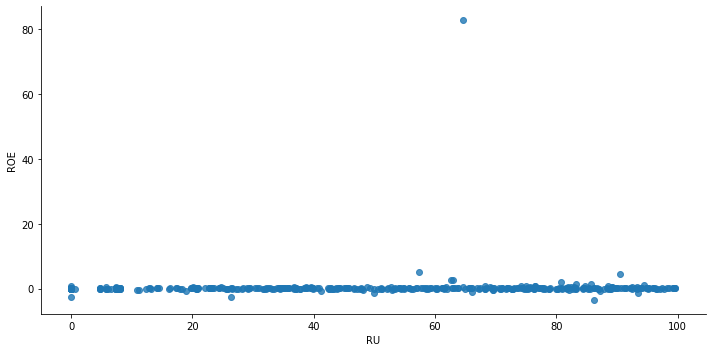

In [277]:
sns.lmplot(x='RU', y='ROE', data=long_data, fit_reg=False, palette='viridis', height=5, aspect=2)
plt.ylabel("ROE")
plt.xlabel("RU");

In [280]:
# a). CONTOLLING FOR LV


ROE_RU_LV_no_interaction = smf.ols(formula='ROE ~ RU + LV', data=long_data).fit()
summary = ROE_RU_LV_no_interaction.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.575
Date:                Sat, 30 Jul 2022   Prob (F-statistic):              0.208
Time:                        14:40:38   Log-Likelihood:                -1239.8
No. Observations:                 445   AIC:                             2486.
Df Residuals:                     442   BIC:                             2498.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5559      0.454      1.226      0.2

In [288]:
# b). CONTOLLING FOR LV


ROE_RU_LV_no_interaction = smf.ols(formula='ROE ~ RU + FS', data=long_data).fit()
summary = ROE_RU_LV_no_interaction.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.726
Date:                Sat, 30 Jul 2022   Prob (F-statistic):             0.0666
Time:                        14:42:39   Log-Likelihood:                -1238.7
No. Observations:                 445   AIC:                             2483.
Df Residuals:                     442   BIC:                             2496.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1148      3.791      2.140      0.0

#### 5.	Is there a statistically significant relationship between EI and ROA while controlling for firm size and leverage

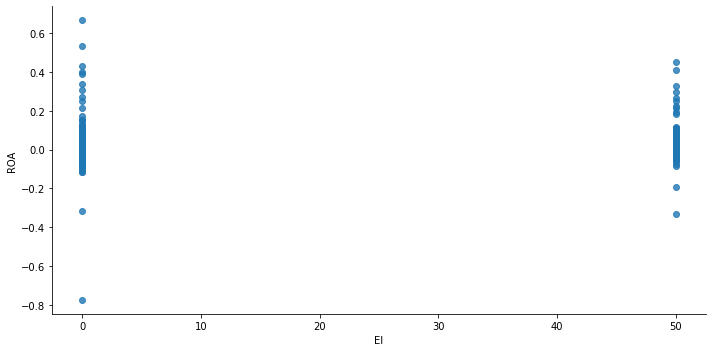

In [296]:
sns.lmplot(x='EI', y='ROA', data=long_data, fit_reg=False, palette='viridis', height=5, aspect=2)
plt.ylabel("ROA")
plt.xlabel("EI");

In [289]:
# a). CONTOLLING FOR FS


ROA_EI_FS_no_interaction = smf.ols(formula='ROA ~ EI + FS', data=long_data).fit()
summary = ROA_EI_FS_no_interaction.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     4.426
Date:                Sat, 30 Jul 2022   Prob (F-statistic):             0.0125
Time:                        14:42:54   Log-Likelihood:                 430.35
No. Observations:                 445   AIC:                            -854.7
Df Residuals:                     442   BIC:                            -842.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1884      0.079     -2.370      0.0

In [290]:
# b). CONTOLLING FOR LV
ROA_EI_FS_no_interaction = smf.ols(formula='ROA ~ EI + LV', data=long_data).fit()
summary = ROA_EI_FS_no_interaction.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     10.80
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           2.63e-05
Time:                        14:43:57   Log-Likelihood:                 436.55
No. Observations:                 445   AIC:                            -867.1
Df Residuals:                     442   BIC:                            -854.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0750      0.009      8.603      0.0

#####  6.	Is there a statistically significant relationship between EI and ROE while controlling for firm size and leverage

In [294]:
# a). CONTOLLING FOR LV
ROE_EI_FS_no_interaction = smf.ols(formula='ROE ~ EI + FS', data=long_data).fit()
summary = ROE_EI_FS_no_interaction.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5701
Date:                Sat, 30 Jul 2022   Prob (F-statistic):              0.566
Time:                        14:46:29   Log-Likelihood:                -1240.8
No. Observations:                 445   AIC:                             2488.
Df Residuals:                     442   BIC:                             2500.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6469      3.397      1.073      0.2

In [295]:
ROE_EI_LV_no_interaction = smf.ols(formula='ROE ~ EI + LV', data=long_data).fit()
summary = ROE_EI_LV_no_interaction.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.289
Date:                Sat, 30 Jul 2022   Prob (F-statistic):              0.277
Time:                        14:46:31   Log-Likelihood:                -1240.1
No. Observations:                 445   AIC:                             2486.
Df Residuals:                     442   BIC:                             2499.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8323      0.378      2.205      0.0

7.	Which of the three RU, EM, EI is a better predictor of financial performance as represented by ROA and ROE while controlling for firm size, leverage?

In [48]:
ROA_multi_LV = smf.ols(formula='ROA ~ EI + EM + RU + LV', data=long_data).fit()
summary = ROA_multi_LV.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     6.594
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           3.68e-05
Time:                        09:21:53   Log-Likelihood:                 438.89
No. Observations:                 445   AIC:                            -867.8
Df Residuals:                     440   BIC:                            -847.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0656      0.011      6.196      0.0

In [50]:
ROA_multi_FS = smf.ols(formula='ROA ~ EI + EM + RU + FS', data=long_data).fit()
summary = ROA_multi_FS.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.230
Date:                Wed, 03 Aug 2022   Prob (F-statistic):             0.0649
Time:                        09:49:12   Log-Likelihood:                 430.40
No. Observations:                 445   AIC:                            -850.8
Df Residuals:                     440   BIC:                            -830.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1732      0.093     -1.858      0.0

#### ROA Multiple Model Explanation
- I would say that EM is a better predictor of ROA when controlling for LV, however it is outperfomed by EI when EI when FS is held constant.

In [51]:
ROE_multi_LV = smf.ols(formula='ROE ~ EI + EM + RU + LV', data=long_data).fit()
summary = ROE_multi_LV.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.959
Date:                Wed, 03 Aug 2022   Prob (F-statistic):             0.0998
Time:                        09:52:10   Log-Likelihood:                -1237.5
No. Observations:                 445   AIC:                             2485.
Df Residuals:                     440   BIC:                             2505.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6530      0.458      1.426      0.1

In [52]:
ROE_multi_FS = smf.ols(formula='ROE ~ EI + EM + RU + FS', data=long_data).fit()
summary = ROE_multi_FS.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.248
Date:                Wed, 03 Aug 2022   Prob (F-statistic):             0.0631
Time:                        09:53:07   Log-Likelihood:                -1236.9
No. Observations:                 445   AIC:                             2484.
Df Residuals:                     440   BIC:                             2504.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9899      3.951      1.516      0.1

##### ROE Multiple Model explanation:

- RU is a better predictor of ROE both when controlling for LV and FS


- 8.	What is the time lag of the predictors RU, EM, EI to show a positive financial performance as represented by ROA and ROE while controlling for firm size, leverage


In [ ]:
ROA_multi_FS = smf.ols(formula='ROA ~ EI + EM + RU + FS', data=long_data).fit()
summary = ROA_multi_FS.summary()
print(summary)

In [53]:
long_data

,CN_ID,IND_ID,CHQ_ID,Year,EM,RU,EI,ROA,ROE,FS,LV
0,1,2,1,2021,59.415584,57.692308,0.0,0.062133,0.141931,22.714080,0.376769
1,2,2,1,2021,36.440678,35.964912,50.0,0.047013,0.107257,22.494671,0.224894
2,3,2,1,2021,69.285714,44.029851,50.0,0.026121,0.221638,22.112328,0.558066
3,4,1,2,2021,76.530612,92.910448,0.0,0.060561,0.283454,22.272495,0.195132
4,5,3,2,2021,0.000000,0.000000,0.0,-0.015718,-0.026849,21.291634,0.276344
...,...,...,...,...,...,...,...,...,...,...,...
440,87,2,25,2017,27.000000,20.652174,0.0,-0.000308,-0.001107,21.802944,0.243981
441,89,2,25,2017,59.859155,65.942029,0.0,0.059889,0.113228,22.942328,0.241784
442,65,3,25,2017,7.746479,0.000000,0.0,0.008526,0.014053,22.357870,0.193548
443,84,3,25,2017,47.183099,13.043478,0.0,0.034198,0.113703,21.534907,0.366983


##### Variable specification
-	Independent variables: EM, RU, EI
-	Controlling variables: FS, LV
-	Dependent Variables: ROA, ROA
-	Time period: 2017 to 2021
1.	Is there a statistically significant relationship between EM and ROA while controlling for firm size and leverage


In [19]:
len(CN_ID)

445